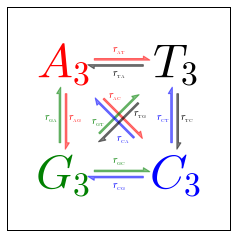

In [2]:
#!/usr/bin/env python
"""Arrow drawing example for the new fancy_arrow facilities.

Code contributed by: Rob Knight <rob@spot.colorado.edu>

usage:

  python arrow_demo.py realistic|full|sample|extreme


"""
import matplotlib.pyplot as plt
import numpy as np

rates_to_bases = {'r1': 'AT', 'r2': 'TA', 'r3': 'GA', 'r4': 'AG', 'r5': 'CA',
                  'r6': 'AC', 'r7': 'GT', 'r8': 'TG', 'r9': 'CT', 'r10': 'TC',
                  'r11': 'GC', 'r12': 'CG'}
numbered_bases_to_rates = dict([(v, k) for k, v in rates_to_bases.items()])
lettered_bases_to_rates = dict([(v, 'r' + v) for k, v in rates_to_bases.items()])


def add_dicts(d1, d2):
    """Adds two dicts and returns the result."""
    result = d1.copy()
    result.update(d2)
    return result


def make_arrow_plot(data, size=4, display='length', shape='right',
                    max_arrow_width=0.03, arrow_sep=0.02, alpha=0.5,
                    normalize_data=False, ec=None, labelcolor=None,
                    head_starts_at_zero=True, rate_labels=lettered_bases_to_rates,
                    **kwargs):
    """Makes an arrow plot.

    Parameters:

    data: dict with probabilities for the bases and pair transitions.
    size: size of the graph in inches.
    display: 'length', 'width', or 'alpha' for arrow property to change.
    shape: 'full', 'left', or 'right' for full or half arrows.
    max_arrow_width: maximum width of an arrow, data coordinates.
    arrow_sep: separation between arrows in a pair, data coordinates.
    alpha: maximum opacity of arrows, default 0.8.

    **kwargs can be anything allowed by a Arrow object, e.g.
    linewidth and edgecolor.
    """

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.gcf().set_size_inches(size, size)
    plt.xticks([])
    plt.yticks([])
    max_text_size = size*12
    min_text_size = size
    label_text_size = size*2.5
    text_params = {'ha': 'center', 'va': 'center', 'family': 'sans-serif',
                   'fontweight': 'bold'}
    r2 = np.sqrt(2)

    deltas = {
        'AT': (1, 0),
        'TA': (-1, 0),
        'GA': (0, 1),
        'AG': (0, -1),
        'CA': (-1/r2, 1/r2),
        'AC': (1/r2, -1/r2),
        'GT': (1/r2, 1/r2),
        'TG': (-1/r2, -1/r2),
        'CT': (0, 1),
        'TC': (0, -1),
        'GC': (1, 0),
        'CG': (-1, 0)
        }

    colors = {
        'AT': 'r',
        'TA': 'k',
        'GA': 'g',
        'AG': 'r',
        'CA': 'b',
        'AC': 'r',
        'GT': 'g',
        'TG': 'k',
        'CT': 'b',
        'TC': 'k',
        'GC': 'g',
        'CG': 'b'
        }

    label_positions = {
        'AT': 'center',
        'TA': 'center',
        'GA': 'center',
        'AG': 'center',
        'CA': 'left',
        'AC': 'left',
        'GT': 'left',
        'TG': 'left',
        'CT': 'center',
        'TC': 'center',
        'GC': 'center',
        'CG': 'center'
        }

    def do_fontsize(k):
        return float(np.clip(max_text_size*np.sqrt(data[k]),
                          min_text_size, max_text_size))

    A = plt.text(0, 1, '$A_3$', color='r', size=do_fontsize('A'), **text_params)
    T = plt.text(1, 1, '$T_3$', color='k', size=do_fontsize('T'), **text_params)
    G = plt.text(0, 0, '$G_3$', color='g', size=do_fontsize('G'), **text_params)
    C = plt.text(1, 0, '$C_3$', color='b', size=do_fontsize('C'), **text_params)

    arrow_h_offset = 0.25  # data coordinates, empirically determined
    max_arrow_length = 1 - 2*arrow_h_offset

    max_arrow_width = max_arrow_width
    max_head_width = 2.5*max_arrow_width
    max_head_length = 2*max_arrow_width
    arrow_params = {'length_includes_head': True, 'shape': shape,
                    'head_starts_at_zero': head_starts_at_zero}
    ax = plt.gca()
    sf = 0.6  # max arrow size represents this in data coords

    d = (r2/2 + arrow_h_offset - 0.5)/r2  # distance for diags
    r2v = arrow_sep/r2  # offset for diags

    # tuple of x, y for start position
    positions = {
        'AT': (arrow_h_offset, 1 + arrow_sep),
        'TA': (1 - arrow_h_offset, 1 - arrow_sep),
        'GA': (-arrow_sep, arrow_h_offset),
        'AG': (arrow_sep, 1 - arrow_h_offset),
        'CA': (1 - d - r2v, d - r2v),
        'AC': (d + r2v, 1 - d + r2v),
        'GT': (d - r2v, d + r2v),
        'TG': (1 - d + r2v, 1 - d - r2v),
        'CT': (1 - arrow_sep, arrow_h_offset),
        'TC': (1 + arrow_sep, 1 - arrow_h_offset),
        'GC': (arrow_h_offset, arrow_sep),
        'CG': (1 - arrow_h_offset, -arrow_sep),
        }

    if normalize_data:
        # find maximum value for rates, i.e. where keys are 2 chars long
        max_val = 0
        for k, v in data.items():
            if len(k) == 2:
                max_val = max(max_val, v)
        # divide rates by max val, multiply by arrow scale factor
        for k, v in data.items():
            data[k] = v/max_val*sf

    def draw_arrow(pair, alpha=alpha, ec=ec, labelcolor=labelcolor):
        # set the length of the arrow
        if display == 'length':
            length = max_head_length + data[pair]/sf*(max_arrow_length -
                                                      max_head_length)
        else:
            length = max_arrow_length
        # set the transparency of the arrow
        if display == 'alph':
            alpha = min(data[pair]/sf, alpha)
        else:
            alpha = alpha
        # set the width of the arrow
        if display == 'width':
            scale = data[pair]/sf
            width = max_arrow_width*scale
            head_width = max_head_width*scale
            head_length = max_head_length*scale
        else:
            width = max_arrow_width
            head_width = max_head_width
            head_length = max_head_length

        fc = colors[pair]
        ec = ec or fc

        x_scale, y_scale = deltas[pair]
        x_pos, y_pos = positions[pair]
        plt.arrow(x_pos, y_pos, x_scale*length, y_scale*length,
              fc=fc, ec=ec, alpha=alpha, width=width, head_width=head_width,
              head_length=head_length, **arrow_params)

        # figure out coordinates for text
        # if drawing relative to base: x and y are same as for arrow
        # dx and dy are one arrow width left and up
        # need to rotate based on direction of arrow, use x_scale and y_scale
        # as sin x and cos x?
        sx, cx = y_scale, x_scale

        where = label_positions[pair]
        if where == 'left':
            orig_position = 3*np.array([[max_arrow_width, max_arrow_width]])
        elif where == 'absolute':
            orig_position = np.array([[max_arrow_length/2.0, 3*max_arrow_width]])
        elif where == 'right':
            orig_position = np.array([[length - 3*max_arrow_width,
                                    3*max_arrow_width]])
        elif where == 'center':
            orig_position = np.array([[length/2.0, 3*max_arrow_width]])
        else:
            raise ValueError("Got unknown position parameter %s" % where)

        M = np.array([[cx, sx], [-sx, cx]])
        coords = np.dot(orig_position, M) + [[x_pos, y_pos]]
        x, y = np.ravel(coords)
        orig_label = rate_labels[pair]
        label = '$%s_{_{\mathrm{%s}}}$' % (orig_label[0], orig_label[1:])

        plt.text(x, y, label, size=label_text_size, ha='center', va='center',
             color=labelcolor or fc)

    for p in positions.keys():
        draw_arrow(p)

# test data
all_on_max = dict([(i, 1) for i in 'TCAG'] +
                  [(i + j, 0.6) for i in 'TCAG' for j in 'TCAG'])

realistic_data = {
    'A': 0.4,
    'T': 0.3,
    'G': 0.5,
    'C': 0.2,
    'AT': 0.4,
    'AC': 0.3,
    'AG': 0.2,
    'TA': 0.2,
    'TC': 0.3,
    'TG': 0.4,
    'CT': 0.2,
    'CG': 0.3,
    'CA': 0.2,
    'GA': 0.1,
    'GT': 0.4,
    'GC': 0.1,
    }

extreme_data = {
    'A': 0.75,
    'T': 0.10,
    'G': 0.10,
    'C': 0.05,
    'AT': 0.6,
    'AC': 0.3,
    'AG': 0.1,
    'TA': 0.02,
    'TC': 0.3,
    'TG': 0.01,
    'CT': 0.2,
    'CG': 0.5,
    'CA': 0.2,
    'GA': 0.1,
    'GT': 0.4,
    'GC': 0.2,
    }

sample_data = {
    'A': 0.2137,
    'T': 0.3541,
    'G': 0.1946,
    'C': 0.2376,
    'AT': 0.0228,
    'AC': 0.0684,
    'AG': 0.2056,
    'TA': 0.0315,
    'TC': 0.0629,
    'TG': 0.0315,
    'CT': 0.1355,
    'CG': 0.0401,
    'CA': 0.0703,
    'GA': 0.1824,
    'GT': 0.0387,
    'GC': 0.1106,
    }


if __name__ == '__main__':
    from sys import argv
    d = None
    if len(argv) > 1:
        if argv[1] == 'full':
            d = all_on_max
            scaled = False
        elif argv[1] == 'extreme':
            d = extreme_data
            scaled = False
        elif argv[1] == 'realistic':
            d = realistic_data
            scaled = False
        elif argv[1] == 'sample':
            d = sample_data
            scaled = True
    if d is None:
        d = all_on_max
        scaled = False
    if len(argv) > 2:
        display = argv[2]
    else:
        display = 'length'

    size = 4
    plt.figure(figsize=(size, size))

    make_arrow_plot(d, display=display, linewidth=0.001, edgecolor=None,
                    normalize_data=scaled, head_starts_at_zero=True, size=size)

    plt.draw()

    plt.show()
